In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-attack-analysis-prediction-dataset/o2Saturation.csv
/kaggle/input/heart-attack-analysis-prediction-dataset/heart.csv


In [2]:
import pandas as pd

df = pd.read_csv('/kaggle/input/heart-attack-analysis-prediction-dataset/heart.csv')
df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
df.drop_duplicates(inplace=True)
df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [5]:
import copy

temp = copy.deepcopy(df)
for i in range(len(df)):
    if df.age.iloc[i] < 30:
        temp.age.iloc[i] = 30
    elif df.age.iloc[i] >= 65:
        temp.age.iloc[i] = 70    
    elif df.age.iloc[i] >= 60:
        temp.age.iloc[i] = 60    
    elif df.age.iloc[i] >= 55:
        temp.age.iloc[i] = 60    
    elif df.age.iloc[i] >= 50:
        temp.age.iloc[i] = 50 
    elif df.age.iloc[i] >= 45:
        temp.age.iloc[i] = 50    
    elif df.age.iloc[i] >= 40:
        temp.age.iloc[i] = 40
    elif df.age.iloc[i] >= 35:
        temp.age.iloc[i] = 40
    elif df.age.iloc[i] >= 30:
        temp.age.iloc[i] = 30
temp

/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,60,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,40,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,40,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,60,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,60,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,60,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,50,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,70,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,60,1,0,130,131,0,1,115,1,1.2,1,1,3,0


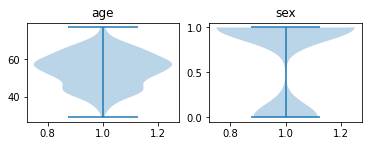

In [6]:
import matplotlib.pyplot as plt

plt.subplot(2, 2, 1)
plt.violinplot([df.age])
plt.title('age')
plt.subplot(2, 2, 2)
plt.violinplot([df.sex])
plt.title('sex')
plt.show()

([<matplotlib.axis.XTick at 0x7f8622f28d50>,
 [Text(0, 0, ''), Text(0, 0, '')])

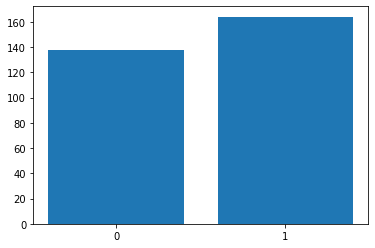

In [7]:
tmp = df.output.value_counts()

plt.bar(tmp.index, tmp.values)
plt.xticks([0, 1])

(array([ 1., 10., 33., 38., 37., 60., 63., 43., 14.,  3.]),
 array([29. , 33.8, 38.6, 43.4, 48.2, 53. , 57.8, 62.6, 67.4, 72.2, 77. ]),
 <BarContainer object of 10 artists>)

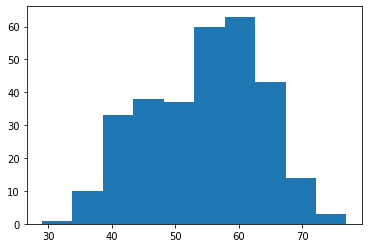

In [8]:
plt.hist(df.age)

In [9]:
df.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

(array([10., 42., 67., 74., 56., 27., 13.,  8.,  3.,  2.]),
 array([ 94. , 104.6, 115.2, 125.8, 136.4, 147. , 157.6, 168.2, 178.8,
        189.4, 200. ]),
 <BarContainer object of 10 artists>)

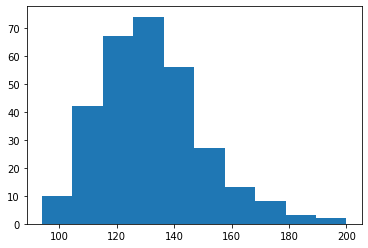

In [10]:
plt.hist(df.trtbps)

(array([143.,   0.,   0.,  50.,   0.,   0.,  86.,   0.,   0.,  23.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

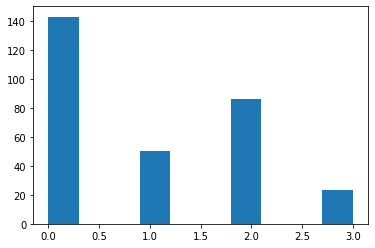

In [11]:
plt.hist(df.cp)

<AxesSubplot:>

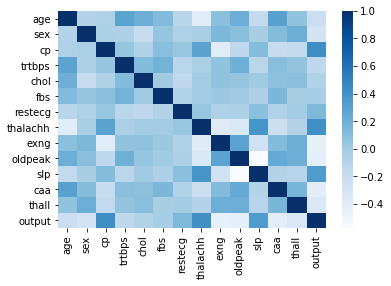

In [12]:
import seaborn as sns

sns.heatmap(df.corr(method='pearson'), cmap = 'Blues')

In [13]:
x = df.iloc[:, 0:-1].values
y = df.iloc[:, -1].values
x,y

(array([[63.,  1.,  3., ...,  0.,  0.,  1.],
        [37.,  1.,  2., ...,  0.,  0.,  2.],
        [41.,  0.,  1., ...,  2.,  0.,  2.],
        ...,
        [68.,  1.,  0., ...,  1.,  2.,  3.],
        [57.,  1.,  0., ...,  1.,  1.,  3.],
        [57.,  0.,  1., ...,  1.,  1.,  2.]]),
 array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import MinMaxScaler

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state= 0)

standardScaler = StandardScaler()
X_train =standardScaler.fit_transform(X_train)
X_test = standardScaler.transform(X_test)

# robustScaler = RobustScaler()
# X_train =robustScaler.fit_transform(X_train)
# X_test = robustScaler.transform(X_test)

# maxAbsScaler = MaxAbsScaler()
# X_train = maxAbsScaler.fit_transform(X_train)
# X_test = maxAbsScaler.transform(X_test)

# minMaxScaler = MinMaxScaler()
# X_train = minMaxScaler.fit_transform(X_train)
# X_test = minMaxScaler.transform(X_test)

print('Shape for training data', X_train.shape, y_train.shape)
print('Shape for testing data', X_test.shape, y_test.shape)

Shape for training data (241, 13) (241,)
Shape for testing data (61, 13) (61,)


In [15]:
X_train, X_test

(array([[-1.30504994, -1.4186261 ,  0.98544689, ..., -0.61492051,
         -0.70674006, -0.49876142],
        [ 1.25925059, -1.4186261 ,  0.98544689, ..., -0.61492051,
          0.29516791, -0.49876142],
        [ 0.36731998,  0.70490738,  0.98544689, ...,  0.99590387,
         -0.70674006, -0.49876142],
        ...,
        [ 0.14433732,  0.70490738,  1.94307874, ..., -0.61492051,
         -0.70674006,  1.1478345 ],
        [-0.85908463,  0.70490738,  0.98544689, ...,  0.99590387,
         -0.70674006, -0.49876142],
        [ 0.36731998,  0.70490738,  0.98544689, ...,  0.99590387,
          1.29707587,  1.1478345 ]]),
 array([[ 0.81328528,  0.70490738,  0.02781503, -0.67462818,  0.65089023,
         -0.40527917, -0.97525383, -1.96657306, -0.6983225 ,  0.27236593,
         -0.61492051,  0.29516791,  1.1478345 ],
        [ 1.03626794,  0.70490738,  1.94307874,  2.19385084, -0.36856884,
         -0.40527917, -0.97525383,  0.23525787, -0.6983225 , -0.39657867,
         -0.61492051, -0.706

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

model = LogisticRegression()
model.fit(X_train, y_train)
predicted=model.predict(X_test)
conf = confusion_matrix(y_test, predicted)
print ("Confusion Matrix : \n", conf)
print ("The accuracy of Logistic Regression is : ", accuracy_score(y_test, predicted)*100, "%")

Confusion Matrix : 
 [[22  5]
 [ 3 31]]
The accuracy of Logistic Regression is :  86.88524590163934 %


In [17]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# train
xgb = XGBClassifier(n_estimators = 3, learning_rate = 0.7, max_depth = 7)
xgb.fit(X_train, y_train)
# prediction
w_pred = xgb.predict(X_test)
print("The accuracy of XGB is : ", accuracy_score(y_test, w_pred)*100, "%")

[02:11:19] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
The accuracy of XGB is :  85.24590163934425 %


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


In [18]:
from sklearn.svm import SVC

model = SVC()
model.fit(X_train, y_train)
  
predicted = model.predict(X_test)
print("The accuracy of SVM is : ", accuracy_score(y_test, predicted)*100, "%")

The accuracy of SVM is :  93.44262295081968 %


In [19]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators = 100, random_state = 0)  
model.fit(X_train, y_train)  
predicted = model.predict(X_test)
print("The accuracy of Random Forest is : ", accuracy_score(y_test, predicted.round())*100, "%")

The accuracy of Random Forest is :  83.60655737704919 %


In [20]:
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors = 2)
classifier.fit(X_train, y_train)
predicted = classifier.predict(X_test)
print("The accuracy of Random Forest is : ", accuracy_score(y_test, predicted.round())*100, "%")


The accuracy of Random Forest is :  81.9672131147541 %


In [21]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(random_state=0, solver='lbfgs', multi_class='ovr').fit(X_train, y_train)
predicted = LR.predict(X_test)
print("The accuracy of LR is : ", accuracy_score(y_test, predicted.round())*100, "%")

The accuracy of LR is :  86.88524590163934 %


In [22]:
from sklearn.neural_network import MLPClassifier

NN = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(100, 40), random_state=0)
NN.fit(X_train, y_train)
predicted = NN.predict(X_test)
print("The accuracy of Neural Network is : ", accuracy_score(y_test, predicted.round())*100, "%")

The accuracy of Neural Network is :  85.24590163934425 %


In [23]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
predicted = gnb.fit(X_train, y_train).predict(X_test)
print("The accuracy of GaussianNB is : ", accuracy_score(y_test, predicted.round())*100, "%")

The accuracy of GaussianNB is :  90.1639344262295 %


In [24]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras import optimizers
import tensorflow as tf
import random as python_random

np.random.seed(42)
python_random.seed(42)
tf.random.set_seed(42)

model = Sequential()
model.add(Dense(16, input_shape = (X_train.shape), activation = 'gelu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer = optimizers.RMSprop(lr=0.001), loss = 'binary_crossentropy', metrics = ['accuracy'])    
model.summary()
model.fit(X_train, y_train, batch_size = 128, epochs = 120, verbose = 0)
results = model.evaluate(X_test, y_test)
pre = model.predict(X_test)
print("The accuracy of Keras is : ", accuracy_score(y_test, pre.round())*100, "%")

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 241, 16)           224       
_________________________________________________________________
dense_1 (Dense)              (None, 241, 1)            17        
Total params: 241
Trainable params: 241
Non-trainable params: 0
_________________________________________________________________
2/2 [==============================] - 0s 3ms/step - loss: 0.3301 - accuracy: 0.9180
The accuracy of Keras is :  91.80327868852459 %
